Index(['time', 'dCHA', 'dMAG', 'vCHA', 'vMAG'], dtype='object')


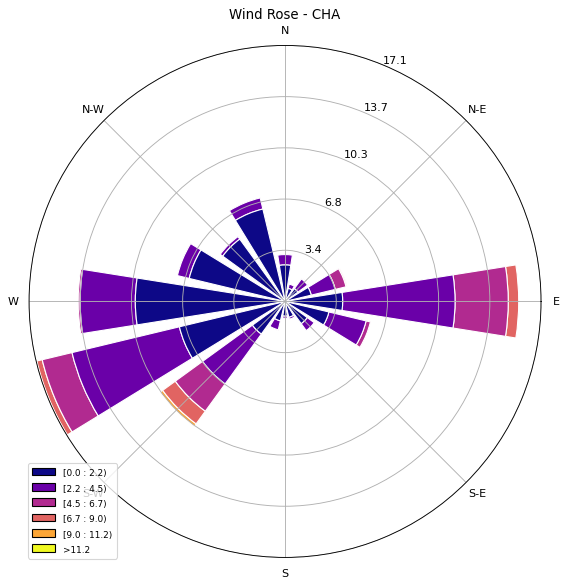

<Figure size 640x480 with 0 Axes>

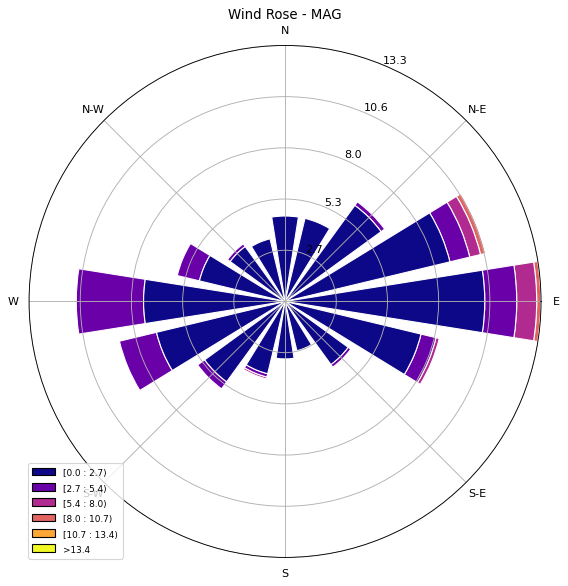

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Load your data
df = pd.read_csv('Wind Speed and Direction.csv', sep=';', decimal=',')
print(df.columns)

# Convert date column to datetime
df['time'] = pd.to_datetime(df['time'], format='%d.%m.%Y %H:%M')

# Function to plot wind rose for one station
def plot_wind_rose(directions, speeds, station_name):
    ax = WindroseAxes.from_ax()

    # Use a colormap (e.g., 'viridis', 'plasma', 'inferno', etc.)
    cmap = plt.cm.plasma  # You can change this to another colormap
    
    # Plot the wind rose with the colormap applied to the speeds
    ax.bar(directions, speeds, normed=True, opening=0.8, edgecolor='white', cmap=cmap)
    ax.set_legend()
    ax.set_title(f"Wind Rose - {station_name}")
    return ax

# Plot for Station 1
plot_wind_rose(df["dCHA"], df["vCHA"], "CHA")

# Plot for Station 2
plt.figure()
plot_wind_rose(df["dMAG"], df["vMAG"], "MAG")

plt.show()

<Figure size 640x480 with 0 Axes>

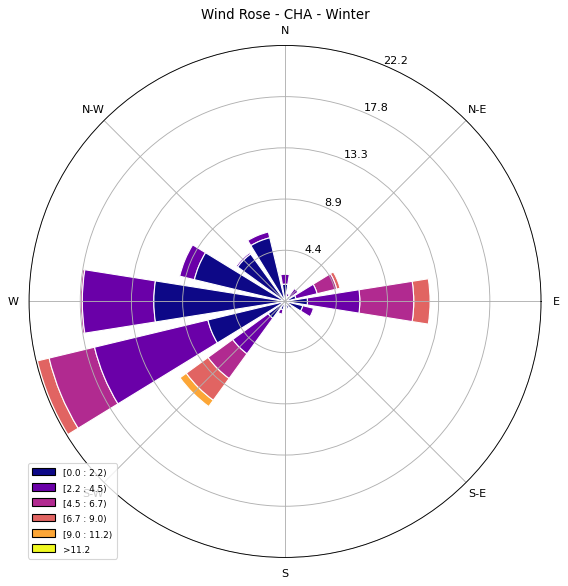

<Figure size 640x480 with 0 Axes>

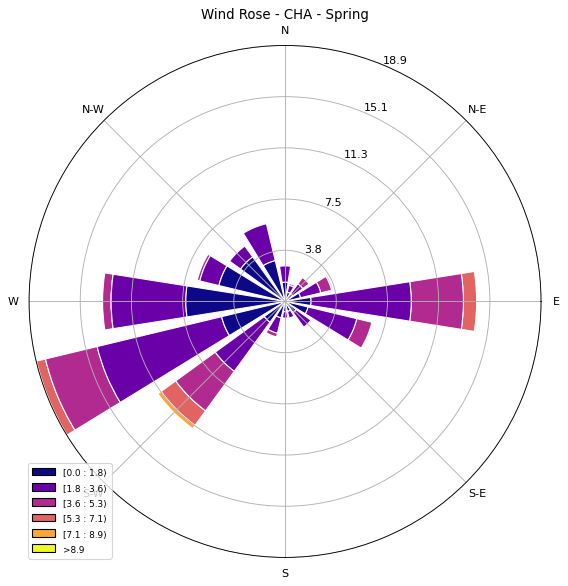

<Figure size 640x480 with 0 Axes>

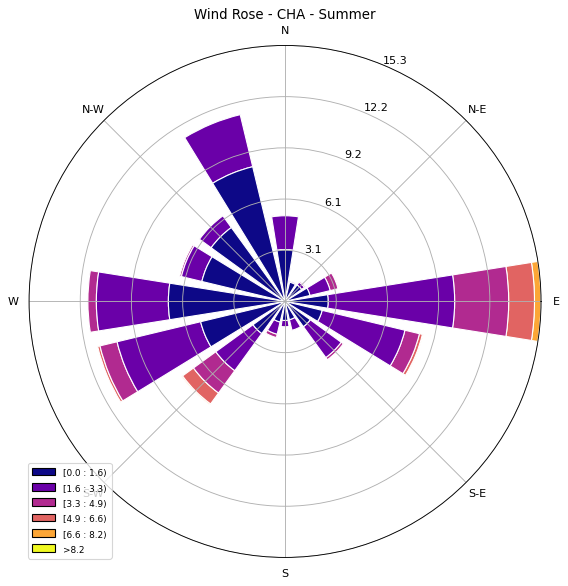

<Figure size 640x480 with 0 Axes>

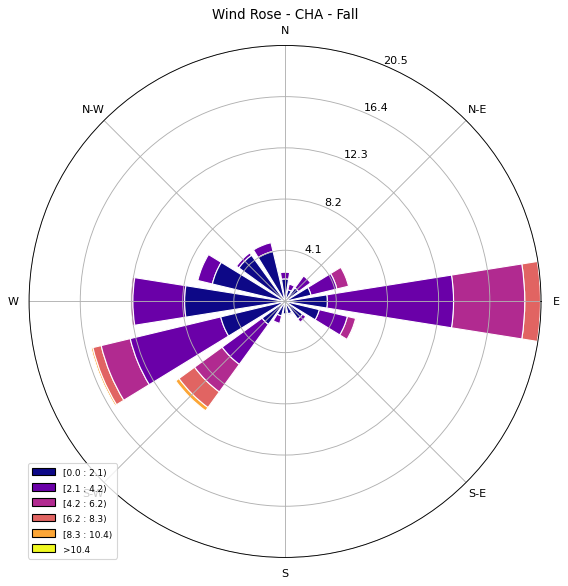

<Figure size 640x480 with 0 Axes>

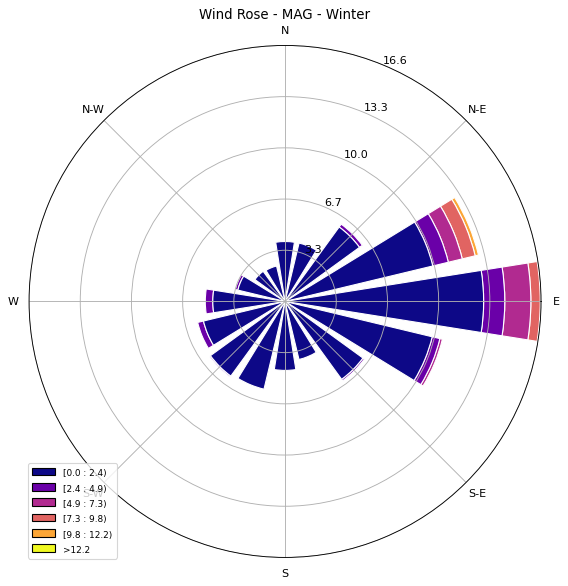

<Figure size 640x480 with 0 Axes>

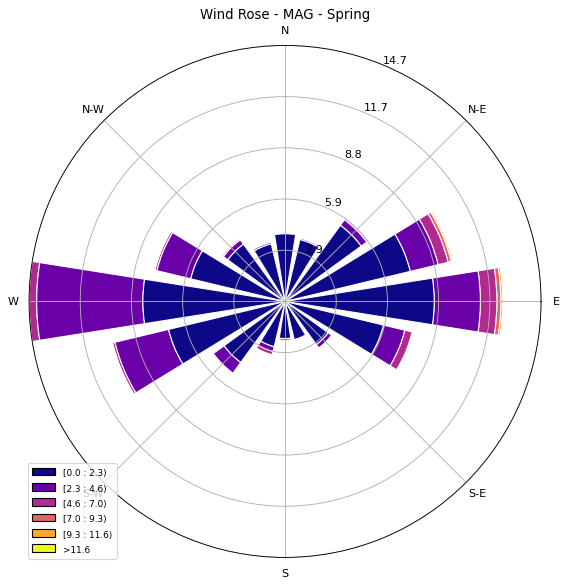

<Figure size 640x480 with 0 Axes>

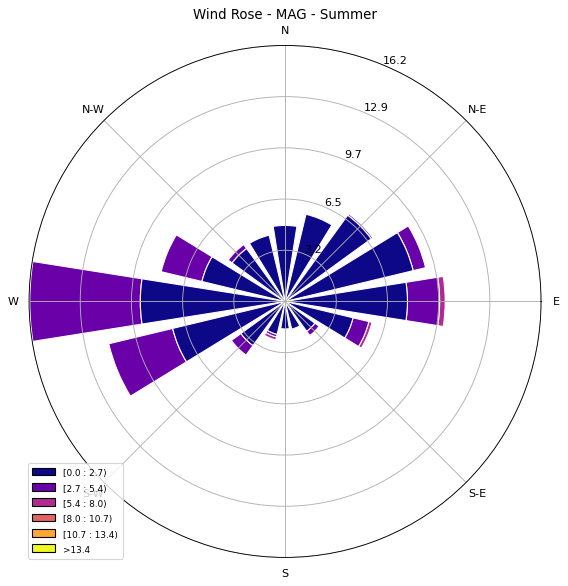

<Figure size 640x480 with 0 Axes>

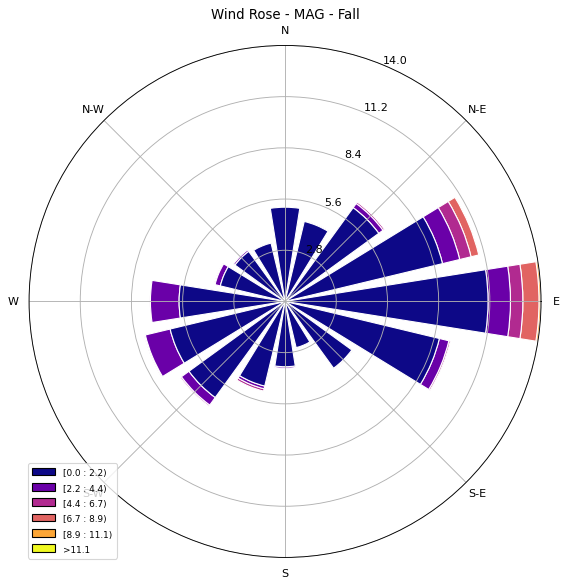

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Load your data
df = pd.read_csv('Wind Speed and Direction.csv', sep=';', decimal=',')
df['time'] = pd.to_datetime(df['time'], format='%d.%m.%Y %H:%M')

# Function to plot wind rose for one station
def plot_wind_rose(directions, speeds, station_name, season_name):
    ax = WindroseAxes.from_ax()

    # Use a colormap (e.g., 'viridis', 'plasma', 'inferno', etc.)
    cmap = plt.cm.plasma  # You can change this to another colormap
    
    # Plot the wind rose with the colormap applied to the speeds
    ax.bar(directions, speeds, normed=True, opening=0.8, edgecolor='white', cmap=cmap)
    ax.set_legend()
    ax.set_title(f"Wind Rose - {station_name} - {season_name}")
    return ax

# Function to plot for all seasons
def plot_for_seasons(df, station_name, direction_column, speed_column):
    seasons = ['Winter', 'Spring', 'Summer', 'Fall']
    
    # Define months for each season
    season_months = {
        'Winter': [12, 1, 2],
        'Spring': [3, 4, 5],
        'Summer': [6, 7, 8],
        'Fall': [9, 10, 11]
    }

    # Create a plot for each season
    for season in seasons:
        # Filter the data for the current season
        season_months_list = season_months[season]
        season_data = df[df['time'].dt.month.isin(season_months_list)]

        # Plot the wind rose for the filtered data
        plt.figure()
        plot_wind_rose(season_data[direction_column], season_data[speed_column], station_name, season)

# Plot for Station 1 (CHA)
plot_for_seasons(df, "CHA", "dCHA", "vCHA")

# Plot for Station 2 (MAG)
plot_for_seasons(df, "MAG", "dMAG", "vMAG")

plt.show()